# CSC 480-F25 Lab 2: Task Decomposition, Multi‑Agent Design Patterns, and Communication Protocols

# Authors:

***Grady Schneider***

California Polytechnic State University, San Luis Obispo;

Computer Science & Software Engineering Department

# Overview

This lab focuses on:
- Breaking down complex problems into smaller tasks (task decomposition)
- Defining specialized agents with clear roles and responsibilities  
- Choosing appropriate multi-agent design patterns
- Specifying communication protocols between agents
- Implementing a three-agent system using AutoGen

NOTE: If you already know what you're going to do for your final project, you may use this lab to make progress on it. Otherwise, treat this lab as a distinct exercise.

## Learning Objectives

By the end of this lab, you will be able to:

- Decompose a complex problem into a comprehensive set of constituent tasks
- Identify and define the roles, responsibilities, and abilities of individual agents
- Select and justify an appropriate multi-agent design pattern (Manager‑Worker, Sequential Pipeline, Collaborative Team)
- Explain and apply foundational agent communication protocols at a high level (MCP, A2A)
- Start thinking about the architecture of your project (agents, tasks, design pattern, and interaction protocols)

# Part 1: Task Decomposition and Agent Design

## 1. Problem Statement & Task Decomposition

**Main Problem:** Search and Rescue operations involve collections of lots of data, and often officers will spend late hours sorting through the data and organizing it. If there was an AI that could efficiently sort and categorize the data, lots of manpower would be saved.

**Task Breakdown:** List the steps and sub-tasks needed to achieve the goal:
1. Decide which sub-task to give it to (i.e. already categorized or already sorted).
2. (sub-task) Categorize data (Alzheimer's cases, cold cases, etc.)
3. (sub-task) Sort data by priority/importance
4. Put data into spreadsheet/website/whatever medium data goes into.

## 2. Agent Definition

Define your primary agents with clear roles and responsibilities:

### Agent 1: Sub-task Organizer
- **Role:** Organizer, first task of the system.
- **Responsibilities:** Taking in data and deciding what needs to be done with it.
- **Inputs:** Raw search-and-rescue data
- **Outputs:** Data to send to sub-task agents (with any additional available information). Whether to send it to categorizer or priority agent or both.
- **Success Criteria:** There's no unnecessary sorting/categorizing.

### Agent 2: Data Categorizer
- **Role:** Categorizes data based on types
- **Responsibilities:** Sorts data into one of multiple relevant categories such as Alzheimer's cases, cold cases, and others.
- **Inputs:** Uncategorized data
- **Outputs:** Categorized data
- **Success Criteria:** Categories make sense to human detectives and help search-and-rescue teams.

### Agent 3: Data Sorter
- **Role:** Sorts data based on importance
- **Responsibilities:** Uses a priority system to prioritize the least and most important data and all in between.
- **Inputs:** Unsorted data
- **Outputs:** Sorted data
- **Success Criteria:** Data priority aligns with investigator/human priority.

### Agent 4: Data Putter
- **Role:** Puts data into spreadsheet/website.
- **Responsibilities:** Merge duplicate data that was both categorized and sorted and places the data based on its priority and categories.
- **Inputs:** Categorized data and sorted data
- **Outputs:** Website/spreadsheet data
- **Success Criteria:** Data is sorted correctly on website.

## 3. Design Pattern Selection

**Chosen Pattern:** Collaborative Team

**Justification:** Sorting and categorizing are generally separate categories, and the organizer prevents redundant work, such as categorizing something twice. The data putter merges the data and prevents duplicate data.

## 4. Communication Design

### Model Context Protocol (MCP)
**Shared Context & Tools:**
- Azure Endpoints to work with model used for agents
- Search-and-rescue data to grab from
- Access to website/spreadsheet for outputting data

### Agent-to-Agent (A2A) Interactions

#### Interaction 1: Sub-task Organizer → Data Categorizer
- **Purpose:** Transports only data to be categorized into the categorizer agent. Prevents unnecessary work.
- **Key Fields:** Category, Data
- **Message Format:** {"Category" : Category, "Data" : Data}

#### Interaction 2: Sub-task Organizer → Data Sorter
- **Purpose:** Transports only data to be sorted into the sorter agent. Prevents unnecessary work.
- **Key Fields:** Priority, Data
- **Message Format:** {"Priority" : Priority, "Data" : Data}

#### Interaction 3: Data Categorizer → Data Putter
- **Purpose:** Transports categorized data as well as category to the Data Putter to be exported to the website/spreadsheet, presumably through an API.
- **Key Fields:** Category, Data
- **Message Format:** {"Category" : Category, "Data" : Data}

#### Interaction 4: Data Sorter → Data Putter
- **Purpose:** Transports sorted data as well as priority to the Data Putter to be exported to the website/spreadsheet, presumably through an API.
- **Key Fields:** Priority, Data
- **Message Format:** {"Priority" : Priority, "Data" : Data}

## 5. Interaction Diagram

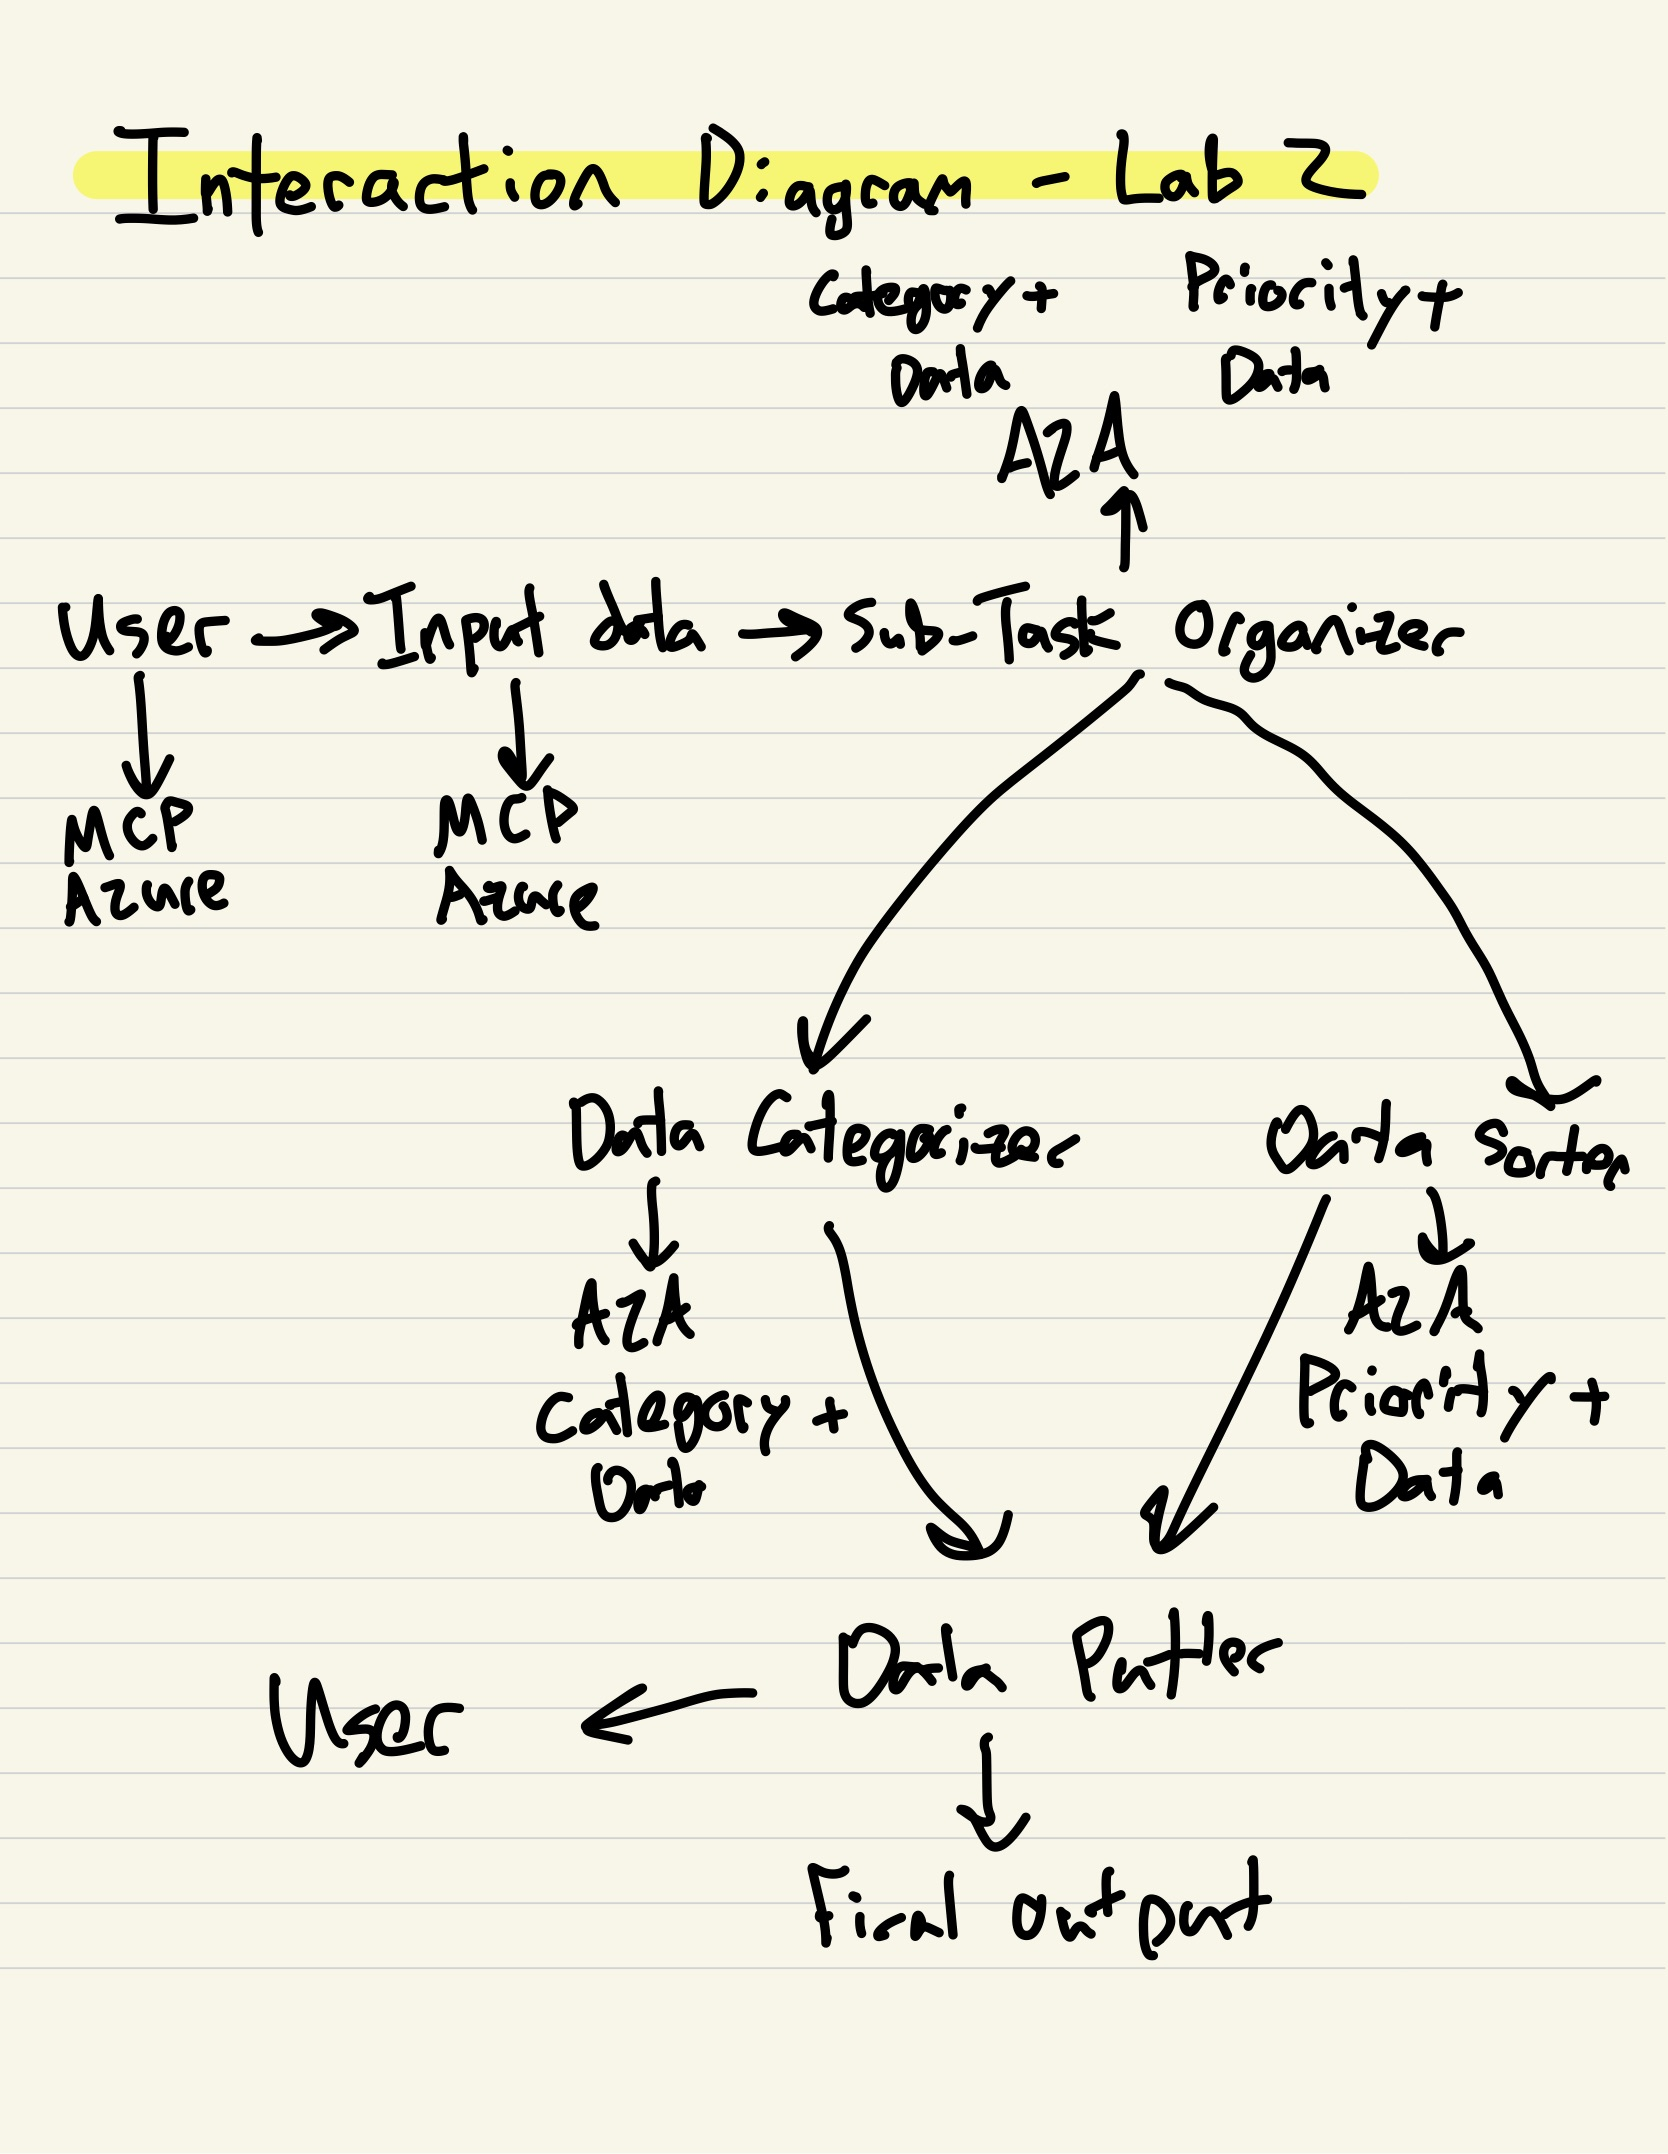

# Part 2: Three-Agent AutoGen Implementation

## Environment Setup

Install required packages and set up Azure OpenAI configuration.

In [ ]:
%pip install "autogen-core" "autogen-agentchat" "autogen-ext[openai,azure]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.4/331.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import asyncio
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_agentchat.conditions import TextMentionTermination
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient

In [ ]:
# This is the same as in L1
azure_deployment = "gpt-5-mini-lab1"
api_version = "2024-12-01-preview"  # If you're using gpt-5-mini as demonstrated

# e.g. https://ccoha-mfoynknp-eastus2.cognitiveservices.azure.com/
azure_endpoint = "https://lab1agent-aifoundry.cognitiveservices.azure.com/"

## An Example Three-Agent System Architecture

Based on the suggested roles from the overview:
- **Planner**: Decomposes the user goal into a concise, ordered plan
- **Implementer**: Executes the steps from the plan
- **Critic/Integrator**: Reviews output and suggests improvements or approves completion

In [ ]:
async def setup_three_agent_system():
    """Set up the three-agent system with Planner, Implementer, and Critic roles"""

    # Create the Azure OpenAI client
    client = AzureOpenAIChatCompletionClient(
        azure_deployment=azure_deployment,
        model="gpt-5-mini",
        api_version=api_version,
        azure_endpoint=azure_endpoint,
        api_key=os.getenv("AZURE_SUBSCRIPTION_KEY"),
    )

    # Define the three agents with specific system prompts
    planner = AssistantAgent(
        name="Planner",
        model_client=client,
        system_message="""You are a task decomposition specialist. Your role is to:
        1. Break down complex user goals into clear, numbered steps
        2. Define specific inputs/outputs for each step
        3. Provide testable acceptance criteria for each step
        4. Present plans in a structured, actionable format

        Always end your response with 'PLAN_COMPLETE' when finished."""
    )

    implementer = AssistantAgent(
        name="Implementer",
        model_client=client,
        system_message="""You are an implementation specialist. Your role is to:
        1. Follow the Planner's steps methodically
        2. Address each step with concrete outputs/artifacts
        3. Provide detailed solutions that meet the specified criteria
        4. Ask for clarification if any step is unclear

        Always end your response with 'IMPLEMENTATION_COMPLETE' when finished."""
    )

    critic = AssistantAgent(
        name="Critic",
        model_client=client,
        system_message="""You are a quality assurance specialist. Your role is to:
        1. Review the Implementer's work against the Planner's criteria
        2. Identify gaps, errors, or missing elements
        3. Suggest specific improvements if needed
        4. Only approve with 'APPROVED' if all criteria are fully met

        Be thorough but constructive in your feedback."""
    )

    return planner, implementer, critic

In [ ]:
async def run_three_agent_workflow(task_description):
    """Run the three-agent workflow for a given task"""

    # Set up the agents
    planner, implementer, critic = await setup_three_agent_system()

    # Create termination condition - look for "APPROVED" in messages
    # See https://microsoft.github.io/autogen/stable//reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TerminationCondition
    termination = TextMentionTermination("APPROVED")

    # Create a group chat with the three agents
    # The RoundRobinGroupChat will manage turn-taking between agents
    # See https://microsoft.github.io/autogen/stable//reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.RoundRobinGroupChat
    team = RoundRobinGroupChat([planner, implementer, critic], termination_condition=termination)

    # Run the workflow
    print("Starting three-agent workflow...")
    print("=" * 60)

    # Start the conversation
    result = await Console(
        team.run_stream(task=task_description)
    )

    return result

## Example Task 1: Analytical Task

Test the three-agent system with a small example analytical task.

In [ ]:
# Test Task 1: Compare sorting algorithms
analytical_task = """
Compare the pros and cons of Quick Sort vs Merge Sort algorithms.
Provide a structured analysis that includes:
- Time and space complexity for both
- Best/worst case scenarios
- Practical use cases for each
- A final recommendation with justification
"""

# Uncomment to run when ready:
await run_three_agent_workflow(analytical_task)

Starting three-agent workflow...
---------- TextMessage (user) ----------

Compare the pros and cons of Quick Sort vs Merge Sort algorithms.
Provide a structured analysis that includes:
- Time and space complexity for both
- Best/worst case scenarios
- Practical use cases for each
- A final recommendation with justification

---------- TextMessage (Planner) ----------
1) Step 1 — Provide clear algorithm summaries
- Input: request to compare Quick Sort and Merge Sort.
- Output: concise descriptions of how each algorithm works and key implementation notes.
- Acceptance criteria (testable):
  - Quick Sort description mentions partitioning, pivot choice, in-place nature, and instability.
  - Merge Sort description mentions divide-and-conquer merging, stability, and extra-memory needs for array implementations.
- Content:
  - Quick Sort: divide-and-conquer sort that picks a pivot, partitions the array into elements less than and greater than the pivot, then recursively sorts partitions. Typ

TaskResult(messages=[TextMessage(id='84e09eb3-b3b4-40b6-b53e-a09c1f61a826', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 1, 18, 55, 21, 859578, tzinfo=datetime.timezone.utc), content='\nCompare the pros and cons of Quick Sort vs Merge Sort algorithms.\nProvide a structured analysis that includes:\n- Time and space complexity for both\n- Best/worst case scenarios\n- Practical use cases for each\n- A final recommendation with justification\n', type='TextMessage'), TextMessage(id='fd3f4667-1aaa-4877-9f30-029a33ae2f4c', source='Planner', models_usage=RequestUsage(prompt_tokens=140, completion_tokens=3169), metadata={}, created_at=datetime.datetime(2025, 10, 1, 18, 55, 59, 625768, tzinfo=datetime.timezone.utc), content="1) Step 1 — Provide clear algorithm summaries\n- Input: request to compare Quick Sort and Merge Sort.\n- Output: concise descriptions of how each algorithm works and key implementation notes.\n- Acceptance criteria (testable):\n  - Qu

## Example Task 2: Creative Task

Test the three-agent system with a creative writing task.

In [ ]:
# Test Task 2: Creative writing with constraints
creative_task = """
Write a 150-word summary of the benefits of renewable energy that:
- Uses exactly 3 specific statistics or data points
- Includes at least 2 types of renewable energy sources
- Has a compelling call-to-action in the final sentence
- Maintains an optimistic but factual tone throughout
"""

# Uncomment to run when ready:
await run_three_agent_workflow(creative_task)

Starting three-agent workflow...
---------- TextMessage (user) ----------

Write a 150-word summary of the benefits of renewable energy that:
- Uses exactly 3 specific statistics or data points
- Includes at least 2 types of renewable energy sources
- Has a compelling call-to-action in the final sentence
- Maintains an optimistic but factual tone throughout

---------- TextMessage (Planner) ----------
1) Parse and formalize the user's requirements
- Input: the user's prompt (150-word summary, exactly 3 specific statistics/data points, at least 2 types of renewable energy, compelling call-to-action in final sentence, optimistic factual tone).
- Output: a clear checklist of constraints to use during composition.
- Acceptance criteria (testable):
  - Checklist includes: word count = 150, statistics count = 3 (numeric values with units or %), renewable types count ≥ 2 (named, e.g., "solar", "wind"), final sentence is a call-to-action (imperative or rallying request), tone labeled "optimist

TaskResult(messages=[TextMessage(id='87241c45-1acc-4f26-b9f7-0b9aa2e41ab5', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 1, 19, 2, 33, 943634, tzinfo=datetime.timezone.utc), content='\nWrite a 150-word summary of the benefits of renewable energy that:\n- Uses exactly 3 specific statistics or data points\n- Includes at least 2 types of renewable energy sources\n- Has a compelling call-to-action in the final sentence\n- Maintains an optimistic but factual tone throughout\n', type='TextMessage'), TextMessage(id='5b49ce5d-889c-406a-8561-3ca236788a1f', source='Planner', models_usage=RequestUsage(prompt_tokens=150, completion_tokens=1604), metadata={}, created_at=datetime.datetime(2025, 10, 1, 19, 2, 55, 229965, tzinfo=datetime.timezone.utc), content='1) Parse and formalize the user\'s requirements\n- Input: the user\'s prompt (150-word summary, exactly 3 specific statistics/data points, at least 2 types of renewable energy, compelling call-to-action 

## Your Task

Write your own task for the planner-implementer-critic system

In [ ]:
your_task = """
Create a ranking of the top five large language models most likely to pass the Turing Test.
Here are some typical questions asked in the Turing Test:
1. Questions involving complex reasoning
2. Questions involving subjective emotions
3. Questions involving abstract morality
4. Questions about common sense/common knowledge
"""
# Uncomment to run when ready:
await run_three_agent_workflow(your_task)

Starting three-agent workflow...
---------- TextMessage (user) ----------

Create a ranking of the top five large language models most likely to pass the Turing Test.
Here are some typical questions asked in the Turing Test:
1. Questions involving complex reasoning
2. Questions involving subjective emotions
3. Questions involving abstract morality
4. Questions about common sense/common knowledge

---------- TextMessage (Planner) ----------
1) Define the evaluation objective and scoring rubric
- Inputs:
  - User-provided question types: complex reasoning; subjective emotions; abstract morality; common sense/common knowledge.
  - Constraint: public information about model capabilities (as of June 2024).
- Outputs:
  - A clear set of evaluation criteria and weights.
  - Mapping from each criterion to measurable metrics or benchmarks.
- Acceptance criteria (testable):
  - The rubric lists exactly 4 criteria (one for each question type) plus an overall human-likeness criterion; weights sum 

TaskResult(messages=[TextMessage(id='4418700c-73d3-4106-b9f6-20fcb3a2e91e', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 10, 1, 19, 10, 48, 605635, tzinfo=datetime.timezone.utc), content='\nCreate a ranking of the top five large language models most likely to pass the Turing Test.\nHere are some typical questions asked in the Turing Test:\n1. Questions involving complex reasoning\n2. Questions involving subjective emotions\n3. Questions involving abstract morality\n4. Questions about common sense/common knowledge\n', type='TextMessage'), TextMessage(id='7350478c-ad6f-4665-a6a8-34e31ef5255f', source='Planner', models_usage=RequestUsage(prompt_tokens=152, completion_tokens=3662), metadata={}, created_at=datetime.datetime(2025, 10, 1, 19, 11, 35, 752680, tzinfo=datetime.timezone.utc), content='1) Define the evaluation objective and scoring rubric\n- Inputs:\n  - User-provided question types: complex reasoning; subjective emotions; abstract morality; co

NOTE: You'll notice that the output might contain duplicated text, that is because `Console` prints when a text message is sent and received.

## Reflection & Analysis

### What worked well?
The agent did great at analytical prompts and solving problems. It also was good with step-by-step logic and things that required research.

### What struggled?
It was still a bit robotic when it came to the creative prompt, and I don't think it had a lot of personality to it. Also, I think it overcomplicated my prompt about the Turing Test in a way that a human-administered interrogator would not do. It's also tedious to read through the long responses that are made up of 6 parts. It also took a long time for my question (3 minutes instead of 1).

### Potential improvements:
Shortening the responses when possible would be good. I think while some prompts may require the long-winded response, others could be much shorter. Also, I think adding some sort of creative agent here might do it some good with the creative prompts.

### Tool integration:
Adding tools may make it quicker so it doesn't need to use the internet for everything. For example with code solving it could use some sort of performance tools. Also, integrating it with some sort of markup language would make the responses look nicer, much like ChatGPT has.

# Optional Extensions

## Adding Tools (Optional Challenge)

Consider adding a simple tool function that agents can use, such as a calculator or text analyzer.

In [ ]:
# Example tool function (uncomment and modify as needed)
# def calculator(expression: str) -> float:
#     """Simple calculator tool for basic mathematical operations"""
#     try:
#         # WARNING: eval() should not be used in production - use a proper math parser
#         result = eval(expression)
#         return result
#     except Exception as e:
#         return f"Error: {str(e)}"

# To integrate tools with AutoGen agents, you would typically:
# 1. Define tool schemas following MCP-like patterns
# 2. Register tools with specific agents
# 3. Update system prompts to mention available tools
# 4. Handle tool calls in the conversation flow

# Summary and Next Steps

## Key Takeaways

- **Task Decomposition**: [Your insights about breaking down complex problems]
- **Agent Design**: [What you learned about defining agent roles and responsibilities]  
- **Communication Protocols**: [Understanding of MCP and A2A interactions]

## References

- [AutoGen Documentation](https://microsoft.github.io/autogen/stable/index.html)
- [Model Context Protocol](https://modelcontextprotocol.io/docs/getting-started/intro)
- [Agent-to-Agent Protocol](https://a2a-protocol.org/latest/)
- L2_overview.md (Lab requirements and detailed explanations)